In [35]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import ttest_ind

%matplotlib inline

## Q5. How does the style of dwelling affect its sale price?

In [36]:
df = pd.read_csv(
    './../DataFiles/house-prices-advanced-regression-techniques/train.csv')

Meaning of BldgTypes<br>
"1Fam" means a single-family detached home.
<br>
"TwnhsE" means a townhouse end unit (house attached on one side).
<br>
"Duplex" means a duplex (a building with two separate living units).
<br>
"Twnhs" means a townhouse (house attached on both sides).
<br>
"2fmCon" means a two-family conversion; a building originally built as a single-family home that has been converted to two separate living units.

<Axes: xlabel='BldgType', ylabel='SalePrice'>

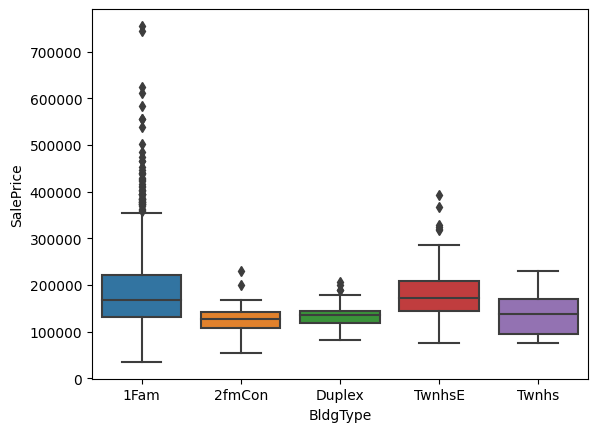

In [37]:
sns.boxplot(x='BldgType', y='SalePrice', data=df)

In [38]:
df.BldgType.value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

First Comment 1Fam (single family detached home) has higher sale prices than the other the lowest is Twnhs and 2fmCon

### Statistical Testing

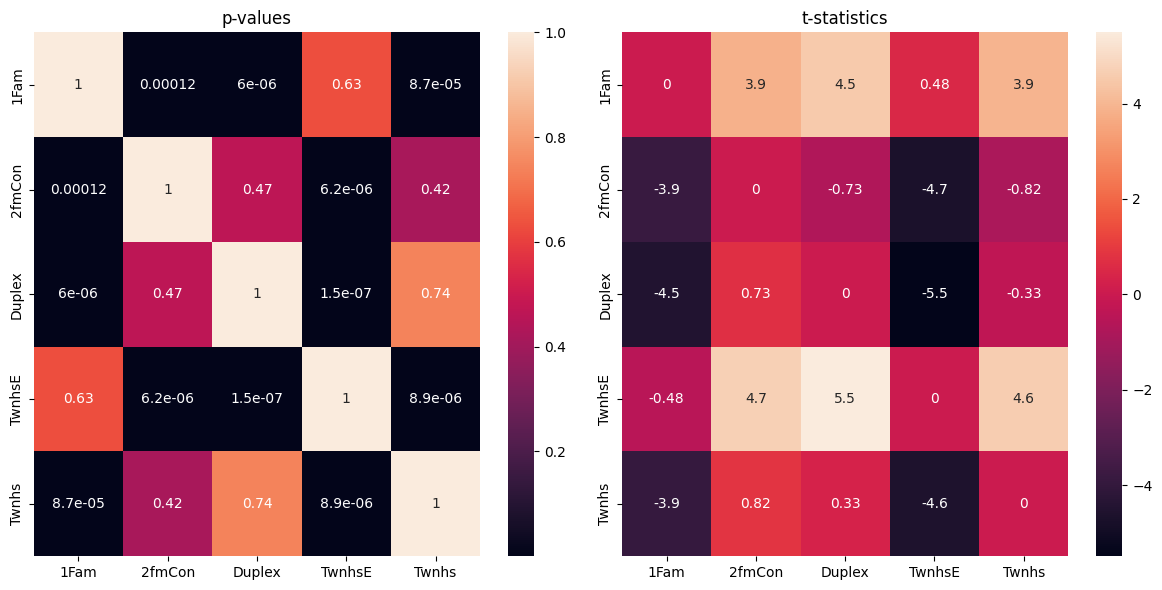

In [39]:
# do pairwise t-tests for all combinations of the 5 building types
# 1Fam, TwnhsE, Duplex, Twnhs, 2fmCon
import numpy as np


pvalues = []
t_statistics = []

for i in range(5):
    for j in range(5):
        df1 = df[df['BldgType'] == df.BldgType.unique()[i]]['SalePrice']
        df2 = df[df['BldgType'] == df.BldgType.unique()[j]]['SalePrice']
        statistic, pvalue = ttest_ind(df1, df2)

        pvalues.append(pvalue)
        t_statistics.append(statistic)


# plot the p-values and t-statistics in a heatmap next to each other
pvalues = np.array(pvalues).reshape(5, 5)
t_statistics = np.array(t_statistics).reshape(5, 5)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(pvalues, annot=True, ax=ax[0])
sns.heatmap(t_statistics, annot=True, ax=ax[1])

# add labels to the heatmap
ax[0].set_xticklabels(df.BldgType.unique())
ax[0].set_yticklabels(df.BldgType.unique())
ax[1].set_xticklabels(df.BldgType.unique())
ax[1].set_yticklabels(df.BldgType.unique())

# add titles to the heatmap
ax[0].set_title('p-values')
ax[1].set_title('t-statistics')

plt.tight_layout()


Answer:
------------
- the style of dwelling (1Fam vs TwnhsE) does not have a significant effect on its sale price.
- There is a significant difference between 1fam, duplex and 1 fam has higher sales prices
- There is a significant difference between 1fam, twnhs and 1 fam has higher sales prices
- There is a significant difference between 1fam, 2fam and 1 fam has higher sales prices (but less difference than the previously 2 mentioned ones
- There is a significant difference between twnhse, duplex and twnhse has higher sales prices
- There is a significant difference between twnhse, twnhs and twnhse has higher sales prices
- There is a significant difference between twnhse, 2fam and twnhse has higher sales prices
- The (df_duplex, df_twnhs) has no significant impact over SalesPrice (twnhs slightly higher than duplex)
- The (df_duplex, df_2fmcon) no significant impact over SalesPrice